<a href="https://colab.research.google.com/github/jimzijun/machine-learning/blob/main/siamese_network/siamese_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Siamese Network with Tensorflow CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras import backend as K

def initialize_base_network():
    input = Input(shape=(105, 105, 1), name="base_input")
    x = Conv2D(64, (10,10), activation='relu')(input)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(128, (7,7), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(128, (4,4), activation='relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Conv2D(256, (4,4), activation='relu')(x)
    x = Flatten()(x)
    x = Dense(4096, activation='sigmoid')(x)
    return Model(inputs=input, outputs=x)

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

base_network = initialize_base_network()

input_a = Input(shape=(105, 105, 1), name="left_input")
input_b = Input(shape=(105, 105, 1), name="right_input")

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, output_shape=(1,), name='distance')([processed_a, processed_b])

model = Model(inputs=[input_a, input_b], outputs=distance)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow_datasets as tfds

# Load the Omniglot dataset
dataset, info = tfds.load('omniglot', with_info=True, as_supervised=True, split=['train', 'test'])
train_dataset, test_dataset = dataset


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/4 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/19280 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/omniglot/3.0.0.incompleteRLN51A/omniglot-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/13180 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/omniglot/3.0.0.incompleteRLN51A/omniglot-test.tfrecord*...:   0%|         …

Generating small1 examples...:   0%|          | 0/2720 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/omniglot/3.0.0.incompleteRLN51A/omniglot-small1.tfrecord*...:   0%|       …

Generating small2 examples...:   0%|          | 0/3120 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/omniglot/3.0.0.incompleteRLN51A/omniglot-small2.tfrecord*...:   0%|       …

Dataset omniglot downloaded and prepared to /root/tensorflow_datasets/omniglot/3.0.0. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='omniglot',
    full_name='omniglot/3.0.0',
    description="""
    Omniglot data set for one-shot learning. This dataset contains 1623 different
    handwritten characters from 50 different alphabets.
    """,
    homepage='https://github.com/brendenlake/omniglot/',
    data_dir='/root/tensorflow_datasets/omniglot/3.0.0',
    file_format=tfrecord,
    download_size=17.95 MiB,
    dataset_size=12.29 MiB,
    features=FeaturesDict({
        'alphabet': ClassLabel(shape=(), dtype=int64, num_classes=50),
        'alphabet_char_id': int64,
        'image': Image(shape=(105, 105, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=1623),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'small1': <SplitInfo num_examples=2720, num_shards=1>,
        'small2': <SplitInfo num_examples=3120, num_shards=1>,
        'test': <SplitInfo num_examples=13180, num_shards=1>,
        'train': <Sp

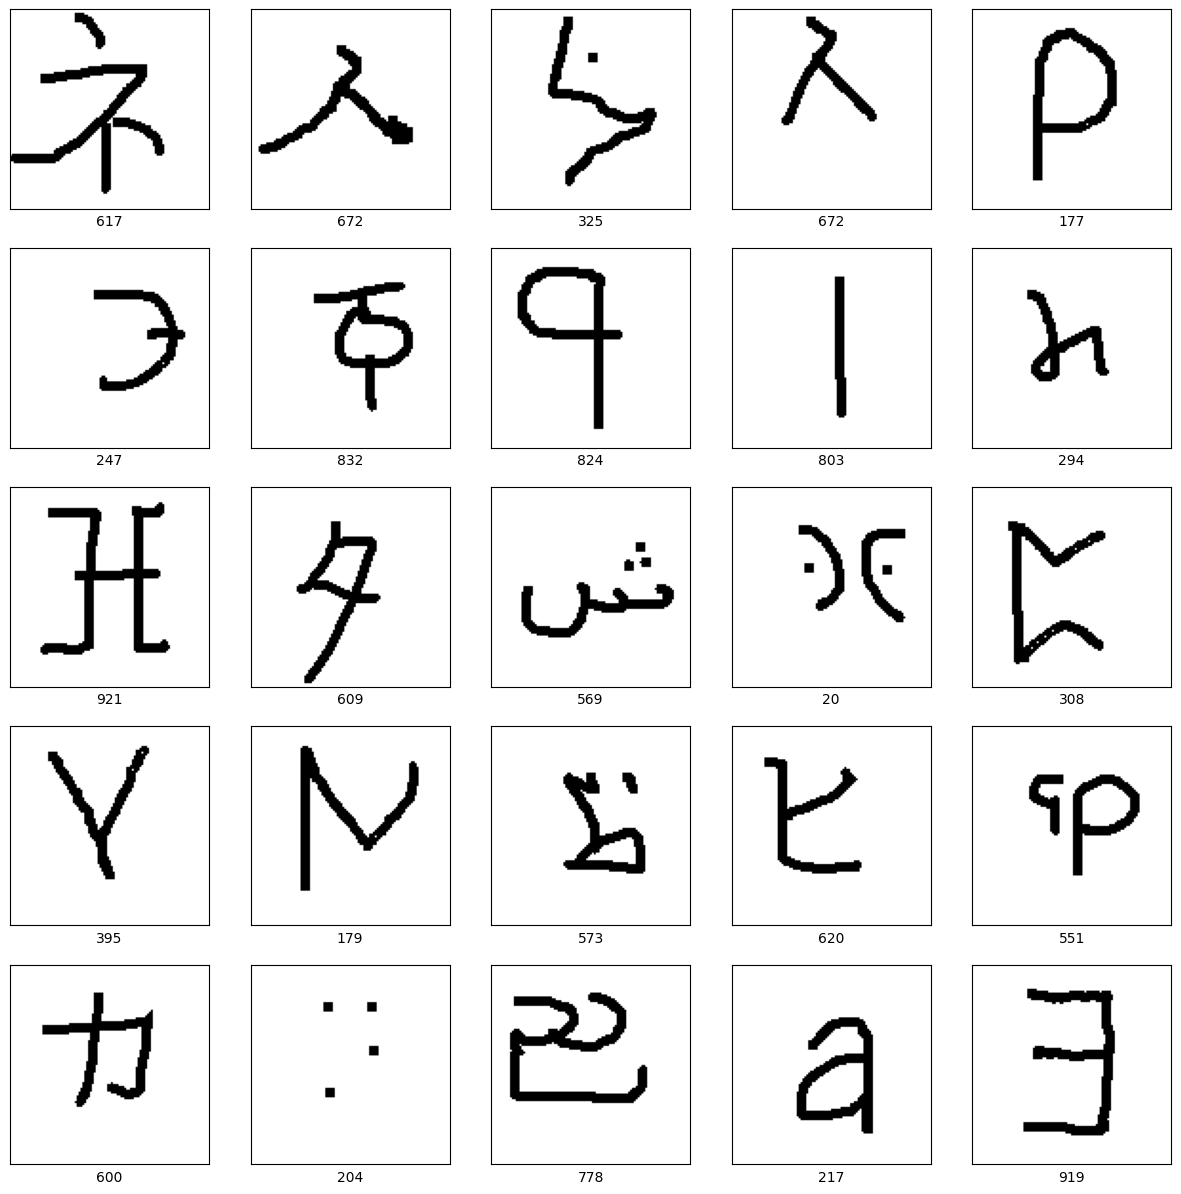

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Omniglot dataset
dataset, info = tfds.load('omniglot', with_info=True, as_supervised=True)

# Print dataset info to understand the structure
print(info)

# Function to plot images
def plot_images(dataset, num_images):
    plt.figure(figsize=(15, 15))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image.numpy().squeeze(), cmap=plt.cm.binary)
        plt.xlabel(label.numpy())
    plt.show()

# Plot some images from the training set
plot_images(dataset['train'], 25)
